In [1]:
# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro

c:\Data\Michael work\Projects\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

In [3]:
SEED = 105

In [4]:
data_size = 104 + 13
n_media_channels = 3
n_extra_features = 1

In [5]:
media_data, extra_features, target, costs = utils.simulate_dummy_data(
    data_size=data_size,
    n_media_channels=n_media_channels,
    n_extra_features=n_extra_features)

In [6]:
media_data.shape

(117, 3)

In [37]:
media_data

Array([[17.421173, 18.141247, 21.24764 ],
       [22.010452, 21.509651, 18.949808],
       [19.996887, 21.274893, 17.01913 ],
       [18.176167, 22.071026, 19.920265],
       [18.818476, 19.669285, 21.63853 ],
       [18.679922, 19.705257, 17.676743],
       [20.353104, 17.530651, 22.20395 ],
       [22.57142 , 20.943333, 20.765509],
       [17.689657, 20.252373, 21.497902],
       [19.323153, 21.3678  , 20.73214 ],
       [20.415548, 20.511702, 19.753227],
       [20.091494, 23.002968, 20.235535],
       [18.50213 , 21.461569, 18.599152],
       [22.188803, 19.879215, 19.528847],
       [16.291569, 19.058706, 19.838305],
       [19.644012, 17.603941, 18.03069 ],
       [20.688938, 18.18583 , 19.414705],
       [19.07878 , 21.898857, 19.203985],
       [21.402035, 20.371378, 18.556866],
       [22.675524, 20.999048, 21.36795 ],
       [20.029842, 20.715153, 18.521503],
       [22.104422, 21.112055, 22.11152 ],
       [21.340178, 21.642742, 20.255486],
       [20.033998, 19.837019, 20.4

In [30]:
target

Array([83.904884, 81.52558 , 82.36868 , 83.42489 , 86.083145, 85.4629  ,
       81.81127 , 83.24169 , 83.86562 , 85.69477 , 83.625565, 85.13753 ,
       86.603966, 83.98286 , 78.68928 , 78.02788 , 74.54881 , 76.47951 ,
       80.35017 , 82.054565, 78.74266 , 85.128525, 83.52925 , 84.66399 ,
       82.7779  , 83.23728 , 82.54148 , 84.11659 , 83.57027 , 83.72478 ,
       81.93531 , 81.16701 , 83.97065 , 87.55519 , 85.48473 , 88.59461 ,
       84.080864, 83.07282 , 85.70106 , 83.11226 , 86.092926, 86.709915,
       82.81548 , 86.3426  , 83.64015 , 81.865005, 79.20394 , 80.24183 ,
       81.78862 , 82.91433 , 82.01397 , 82.323166, 85.7067  , 86.82395 ,
       82.95688 , 83.48767 , 88.1829  , 86.17484 , 85.76131 , 83.24684 ,
       80.65049 , 79.20862 , 79.98687 , 81.48698 , 79.27476 , 79.33426 ,
       78.15223 , 78.56656 , 81.61273 , 79.75169 , 79.08267 , 80.51538 ,
       85.63966 , 84.27175 , 80.05431 , 80.21371 , 82.51826 , 88.28764 ,
       86.99032 , 85.347664, 81.61666 , 81.31311 , 

In [8]:
costs

Array([234.9729 , 235.9593 , 233.85338], dtype=float32)

In [9]:
# Split and scale data.
split_point = data_size - 13
# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
# Extra features
extra_features_train = extra_features[:split_point, ...]
extra_features_test = extra_features[split_point:, ...]
# Target
target_train = target[:split_point]

In [10]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
extra_features_train = extra_features_scaler.fit_transform(extra_features_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

In [11]:
correlations, variances, spend_fractions, variance_inflation_factors = preprocessing.check_data_quality(
    media_data=media_scaler.transform(media_data),
    target_data=target_scaler.transform(target),
    cost_data=costs,
    extra_features_data=extra_features_scaler.transform(extra_features))

In [12]:
correlations[0].style.background_gradient(cmap='RdBu', vmin=-1, vmax=1).format(precision=3)

,feature_0,feature_1,feature_2,extra_feature_0,target
feature_0,1.000,0.088,0.074,0.042,-0.038
feature_1,0.088,1.000,-0.051,0.091,0.279
feature_2,0.074,-0.051,1.000,-0.121,0.189
extra_feature_0,0.042,0.091,-0.121,1.000,0.128
target,-0.038,0.279,0.189,0.128,1.000


In [13]:
def highlight_variances(x: float, 
                        low_variance_threshold: float=1.0e-3, 
                        high_variance_threshold: float=3.0) -> str:

    if x < low_variance_threshold or x > high_variance_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

variances.style.format(precision=4).applymap(highlight_variances)

C:\Users\micha\AppData\Local\Temp\ipykernel_9588\3750940654.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  variances.style.format(precision=4).applymap(highlight_variances)


,geo_0
feature_0,0.0057
feature_1,0.0050
feature_2,0.0049
extra_feature_0,0.0445


In [14]:
def highlight_low_spend_fractions(x: float,
                                  low_spend_threshold: float=0.01) -> str:
    if x < low_spend_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

spend_fractions.style.format(precision=4).applymap(highlight_low_spend_fractions)

C:\Users\micha\AppData\Local\Temp\ipykernel_9588\1856905018.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  spend_fractions.style.format(precision=4).applymap(highlight_low_spend_fractions)


,fraction of spend
feature_0,0.3334
feature_1,0.3348
feature_2,0.3318


In [15]:
def highlight_high_vif_values(x: float,
                              high_vif_threshold: float=7.0) -> str:
    if x > high_vif_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

variance_inflation_factors.style.format(precision=4).applymap(highlight_high_vif_values)

C:\Users\micha\AppData\Local\Temp\ipykernel_9588\44819322.py:12: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  variance_inflation_factors.style.format(precision=4).applymap(highlight_high_vif_values)


,geo_0
feature_0,1.0162
feature_1,1.0180
feature_2,1.0236
extra_feature_0,1.0242


<H3>The currently available models are the following:</H3>

hill_adstock
adstock
carryover

In [16]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")

In [17]:
number_warmup=1000
number_samples=1000

In [18]:
# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    extra_features=extra_features_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    seed=SEED)

c:\Data\Michael work\Projects\venv\Lib\site-packages\lightweight_mmm\lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████| 2000/2000 [00:45<00:00, 43.74it/s, 3 steps of size 1.52e-02. acc. prob=0.57]  


Check whether r_hat <= 1.1, which is important for Bayesian Modeling.

In [19]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.47      0.27      0.38      0.13      1.00     86.33      1.05
ad_effect_retention_rate[1]      0.31      0.18      0.25      0.03      0.60     67.71      1.04
ad_effect_retention_rate[2]      0.34      0.24      0.25      0.00      0.73    102.19      1.04
     coef_extra_features[0]      0.02      0.02      0.02     -0.01      0.04      5.54      1.51
              coef_media[0]      0.01      0.01      0.01      0.00      0.03    135.25      1.03
              coef_media[1]      0.15      0.06      0.15      0.07      0.23      7.94      1.29
              coef_media[2]      0.06      0.05      0.04      0.00      0.13     29.91      1.08
              coef_trend[0]     -0.00      0.00     -0.00     -0.00      0.00     11.76      1.16
                 expo_trend      0.76      0.25      0.66      0.51      1.17      4.39      1.81
                exp

Plots the posterior distributions of estimated media channel effect.

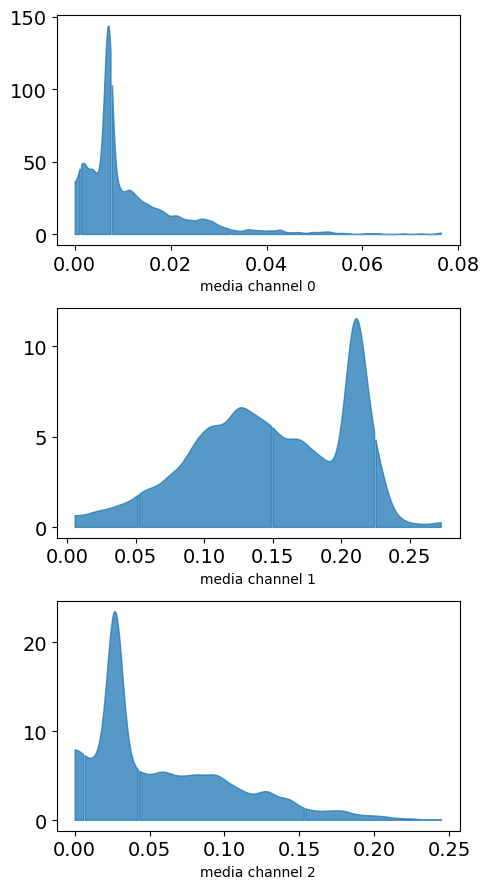

In [35]:
plot.plot_media_channel_posteriors(media_mix_model=mmm)

C:\Users\micha\AppData\Local\Temp\ipykernel_9588\2507476913.py:1: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  plot.plot_prior_and_posterior(media_mix_model=mmm)


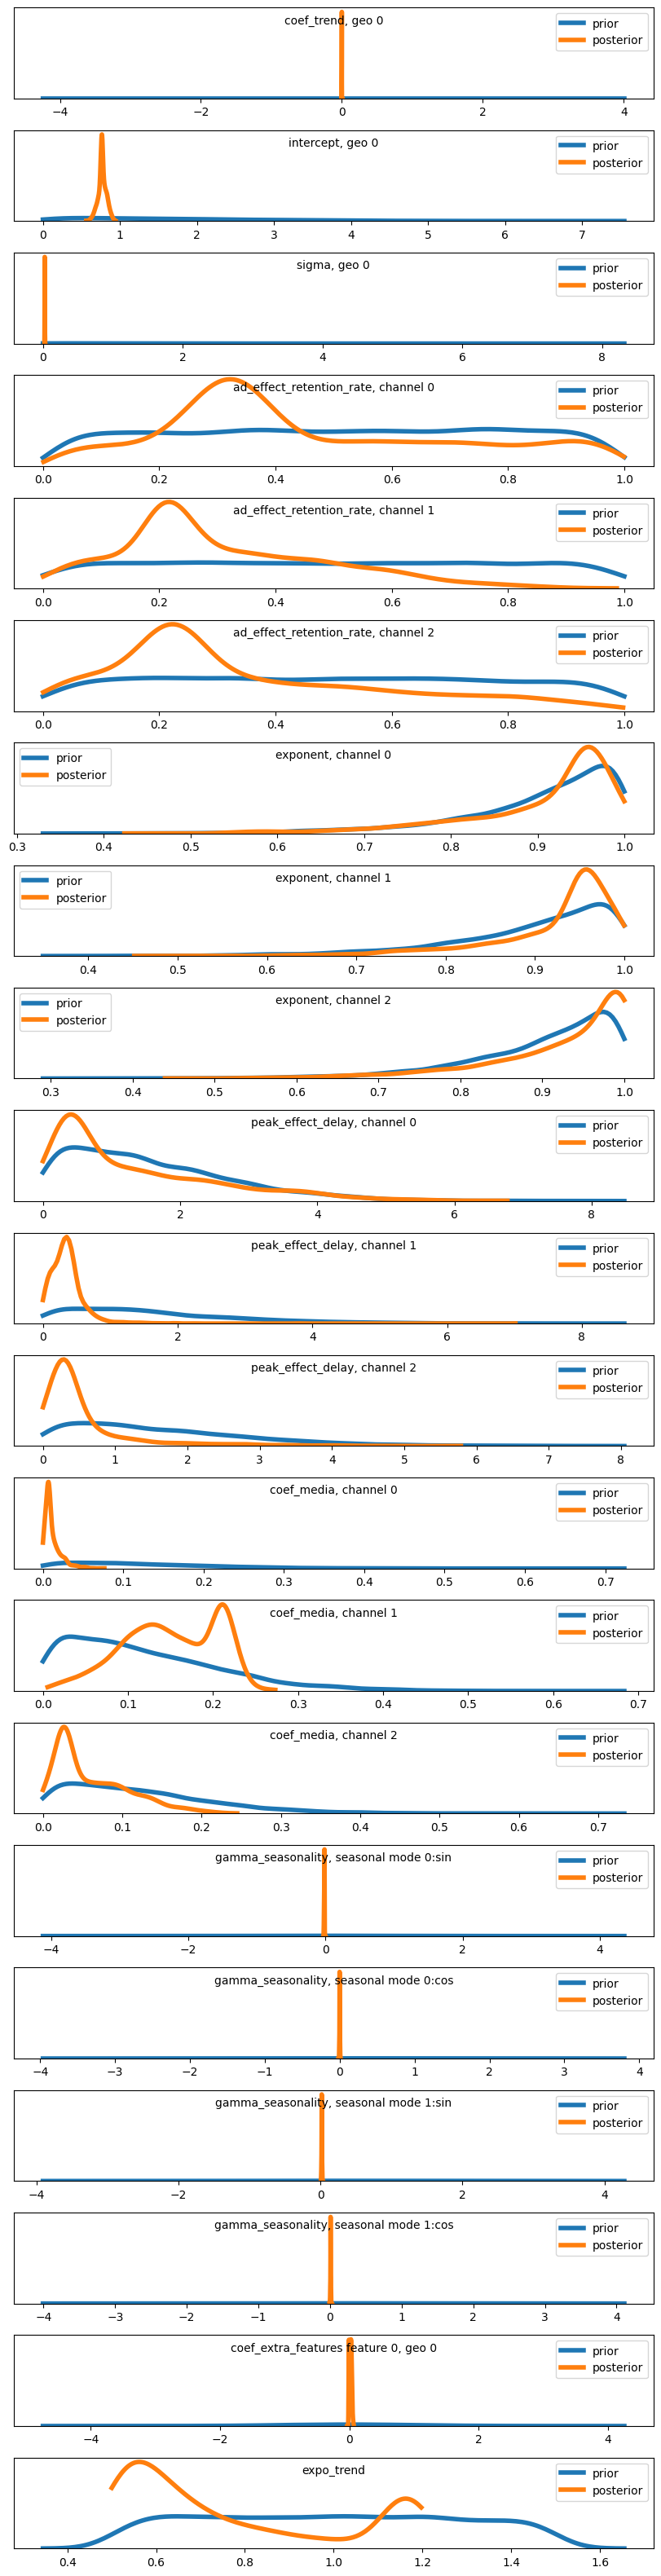

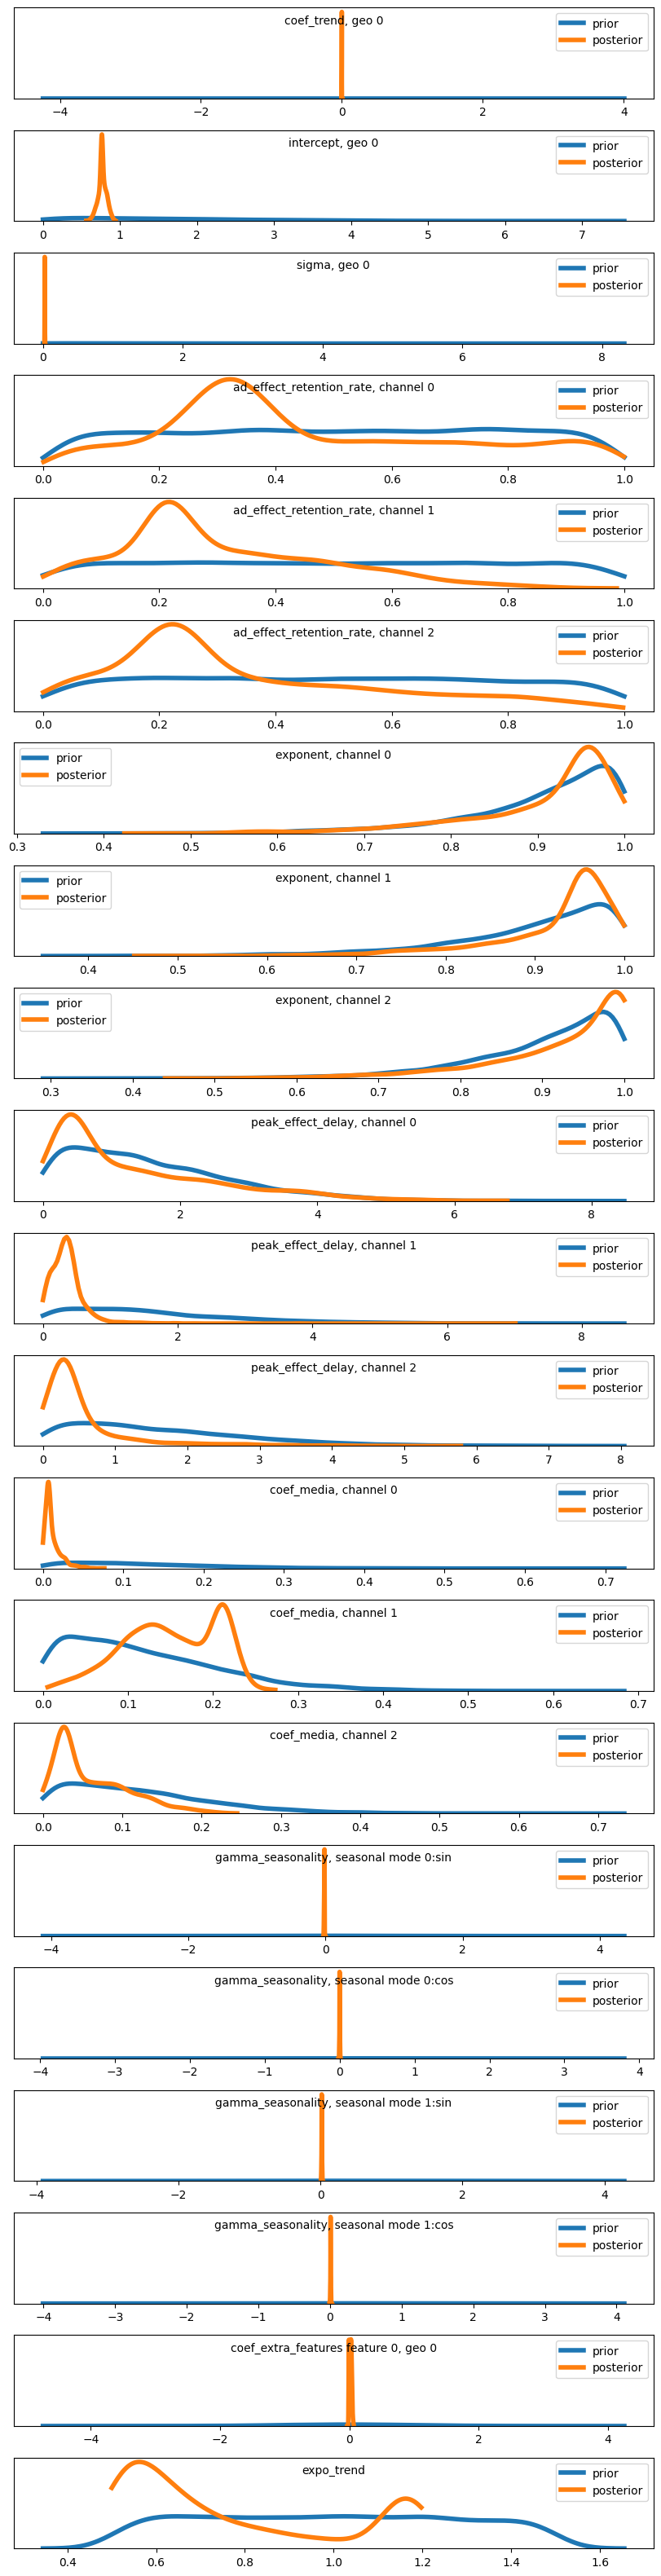

In [21]:
plot.plot_prior_and_posterior(media_mix_model=mmm)

R2 is good if R2 > 0.8, MAPE is good if it's 20% or lower.

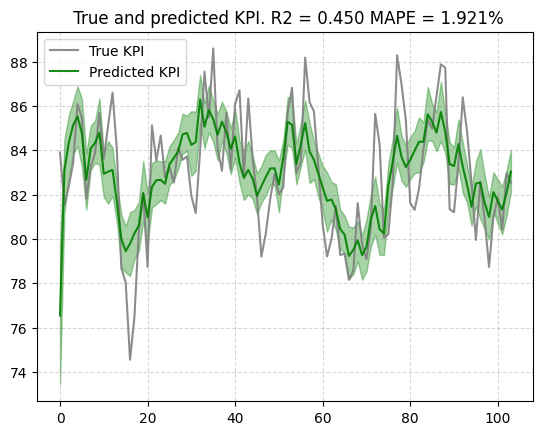

In [22]:
# Here is another example where we can pass the target scaler if you want the plot to be in the "not scaled scale"
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [23]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              extra_features=extra_features_scaler.transform(extra_features_test),
                              seed=SEED)
new_predictions.shape

(2000, 13)

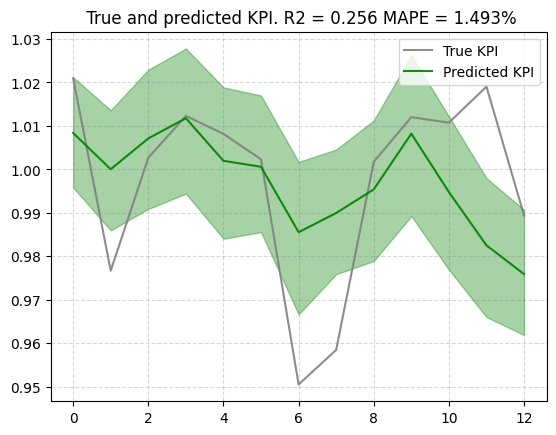

In [24]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:]))

In [25]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

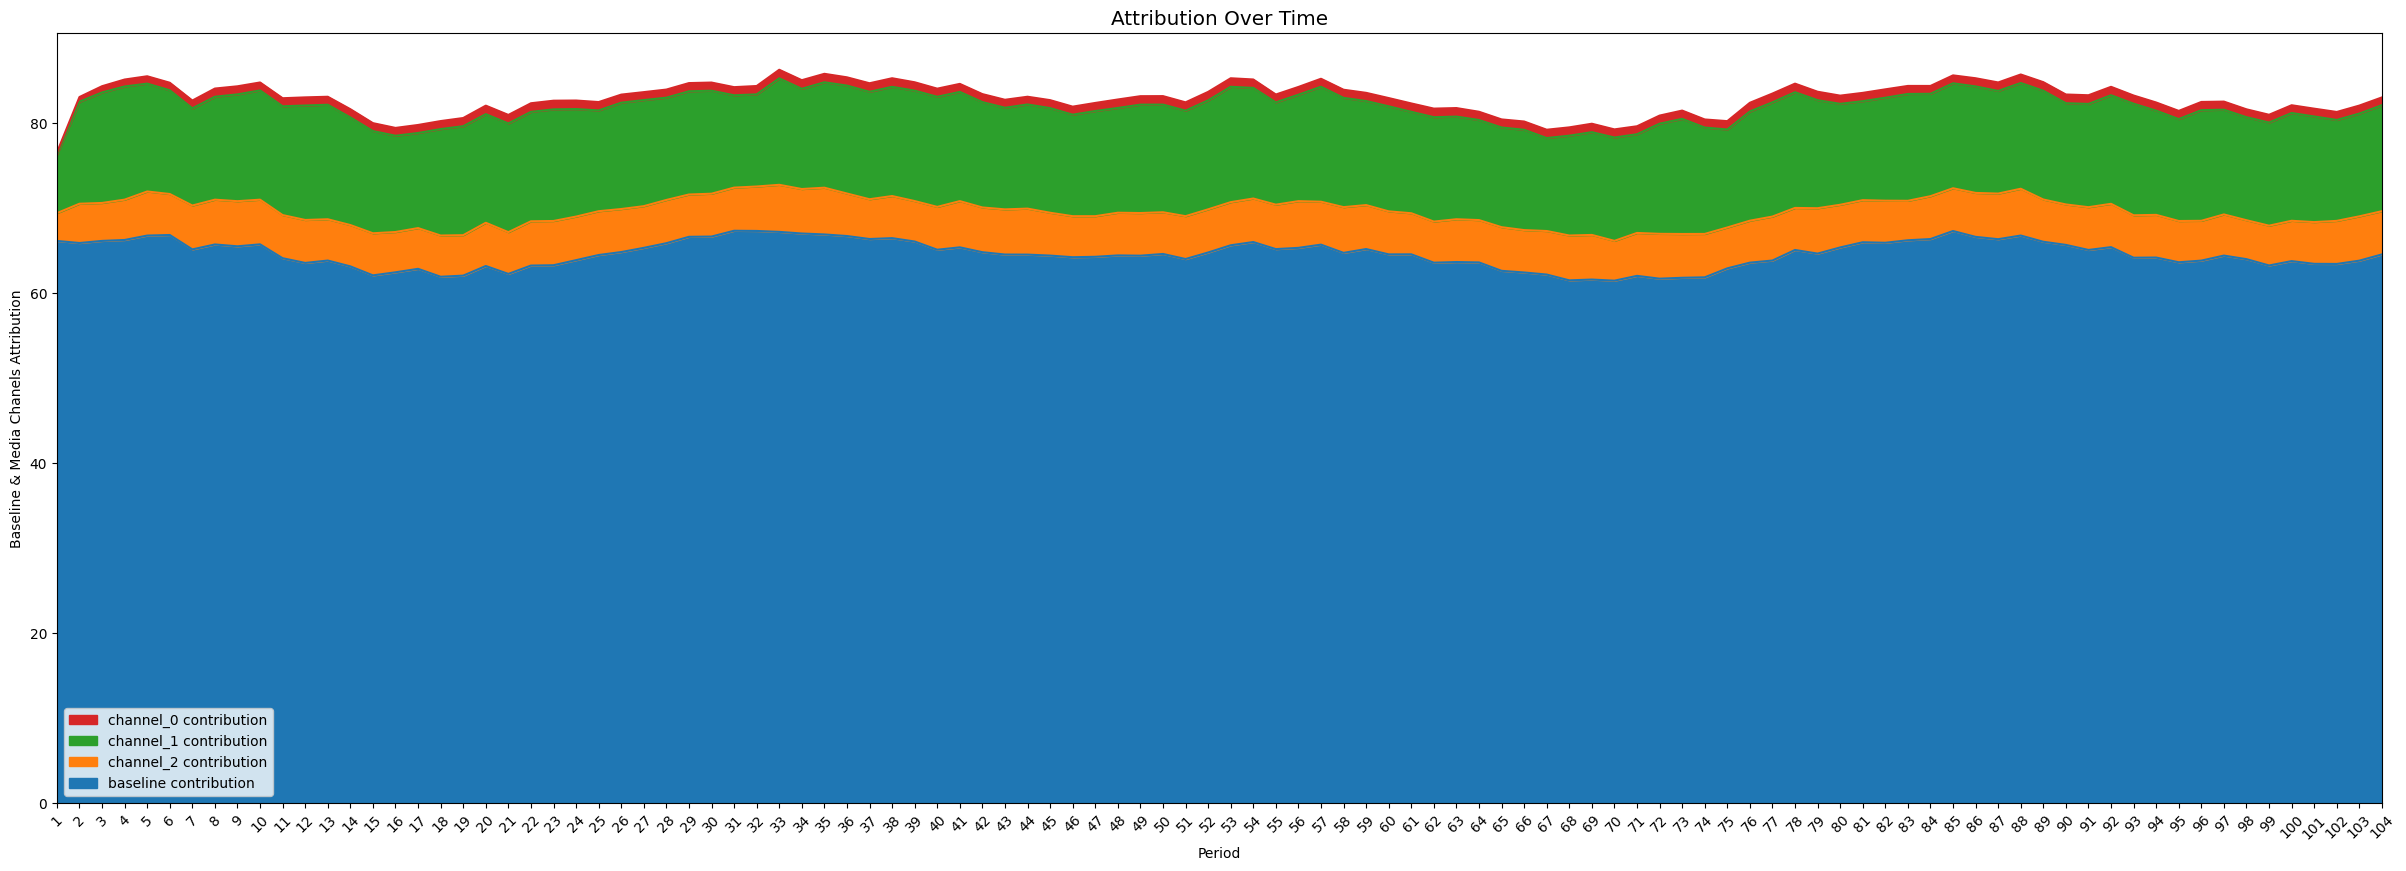

In [26]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

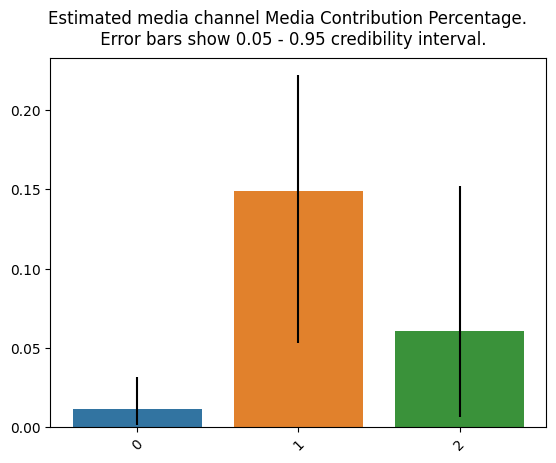

In [27]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage")

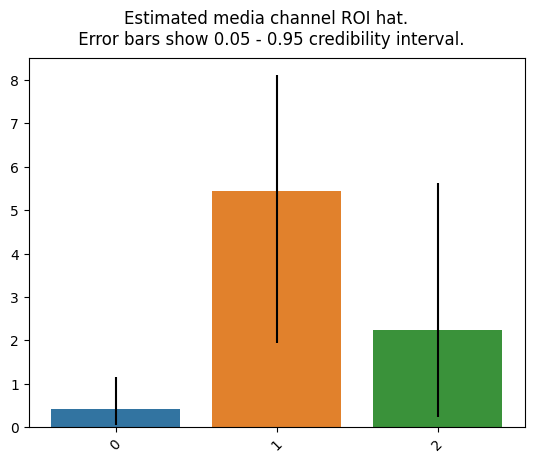

In [28]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat")

Another vital question we can solve with MMMs is how each media channel behaves individually as we invest more in it.

For that we can plot the curve response of all media channels with the following function:

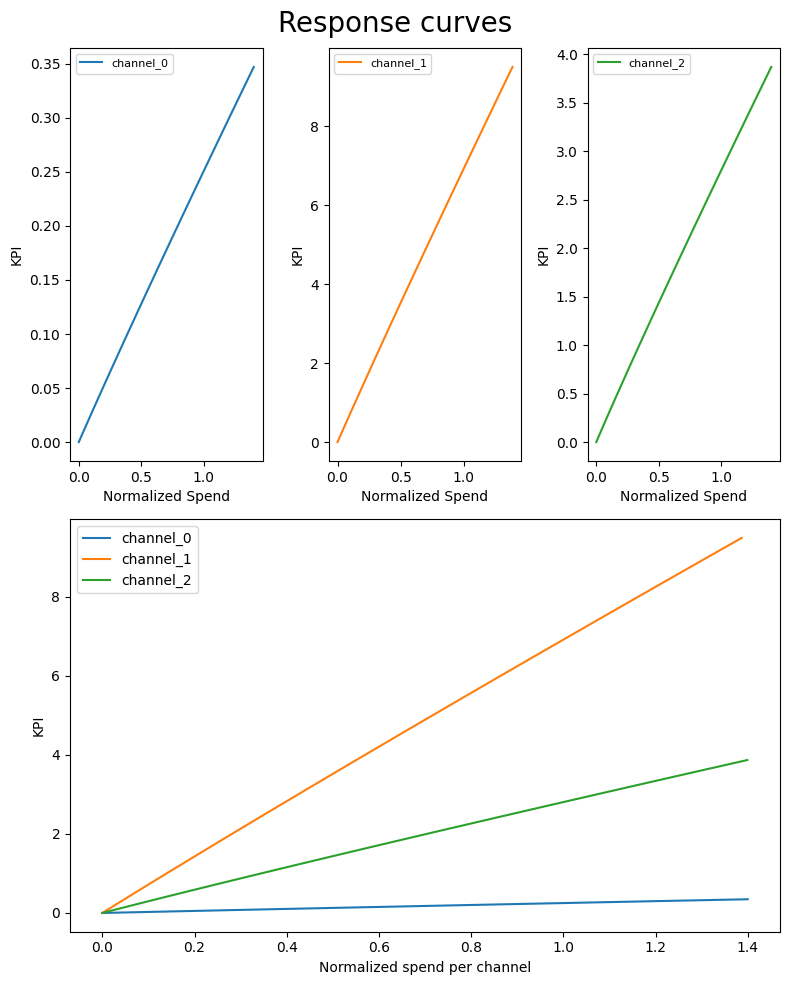

In [29]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler, seed=SEED)

In [38]:
prices = jnp.ones(mmm.n_media_channels)

In [39]:
n_time_periods = 10
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [40]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -849.7787736288243
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9


In [41]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([160.70435, 241.3611 , 200.31541], dtype=float32)

In [42]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([200.82388, 201.07762, 200.47934], dtype=float32)

In [43]:
# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(602.38086, dtype=float32), Array(602.38086, dtype=float32))

In [44]:
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(602.38086, dtype=float32), Array(602.38086, dtype=float32))

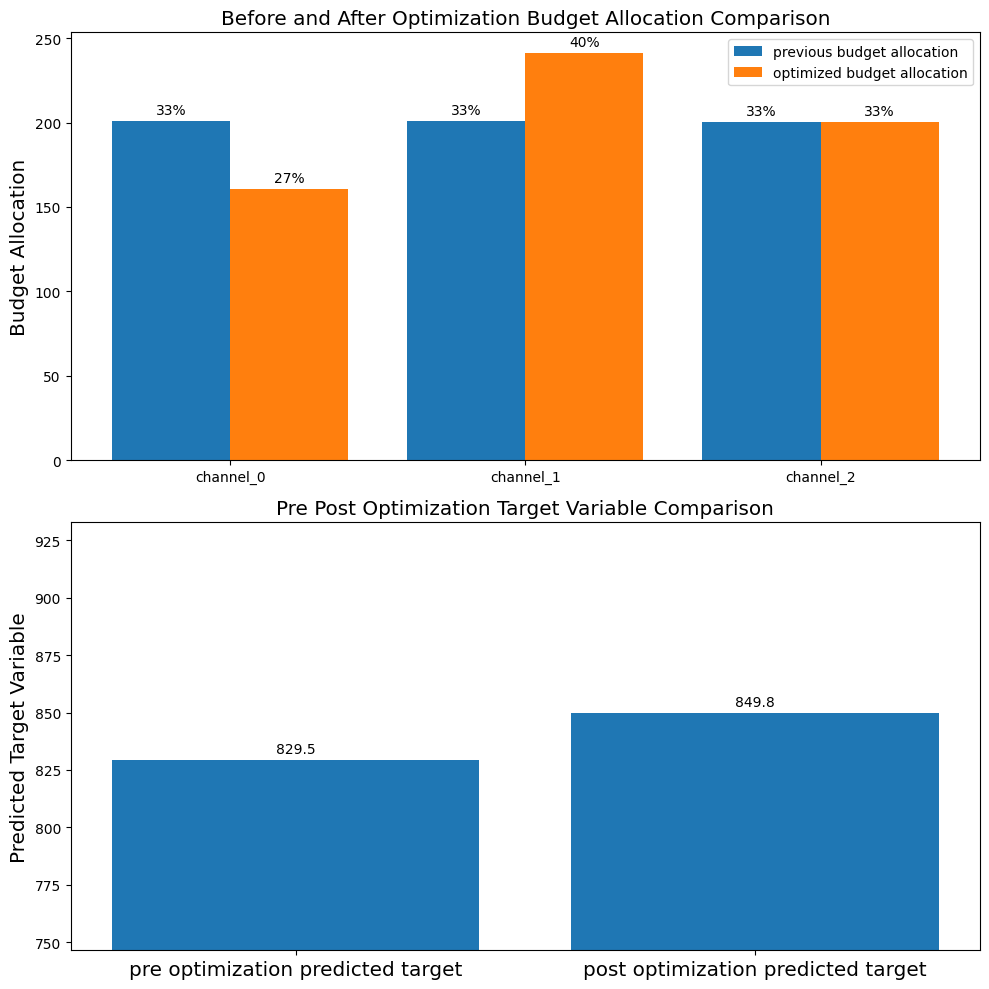

In [45]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10))

In [46]:
# We can use the utilities for saving models to disk.
file_path = "media_mix_model.pkl"
utils.save_model(media_mix_model=mmm, file_path=file_path)

In [47]:
# Once saved one can load the models.
loaded_mmm = utils.load_model(file_path=file_path)
loaded_mmm.trace["coef_media"].shape # Example of accessing any of the model values.

(2000, 3)